In [135]:
from databaseCommunication import getNCount, readDatabaseFile
from dataframeFormating import fitRun_3b_linear, N_linear, createLabeledDataFrame, createLabeledDataFrame_4, fitRun_1and3b, fitRun_1and3b_2, fitRun_3b, fitRun_3b_2, fitRun_3b_3, fitRun_3b_4, getReducedDataframe, getReducedResults, deltaTime, N_polarized, N_polarized_pure3b
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

#getNCount(117000)

In [136]:
# [detuning], [imageID_start, imageID_end]
# TOF for these runs is 8ms
# latticeRamp = 2ms, ODT3 ramp = 10ms
# field rotation at 92ms out of the 100ms to ramp up the lattice

# first run 2 dummies, 25GHz latticePower 0.02 , 0.06 , 0.08 , 0.1  , 0.15 , 0.2  , 0.3, ODT3_Comp = 0.6
# second run added 0.01 (to imageID 132252) and then 0.006
# third run new power added 0.5, 0.8, 1.1, 1.4, 1.7, 1.9, ODT3_Comp = 0.6
# fourth run last power 1.9, ODT3_Comp = 0.6 and 1.5
# fifth run (first in df_2) is a lifetime at 1.4 25 GHz ODT3 0.6 TAKE IN SITU IMAGES LATER
# sixth run (5th in df) is 31 GHZ 0.01 latticeDepth to try to see no suppression at all
# seventh run is lattice off
# eight run is in situ images from the top. 25 GHz for all, the label in the df is changed to the imagingFrequency
# lattice PD at 0.01 0.1 0.3 0.8 1.4 1.9 and ODT3 PD at 0.6, hold = 0 and 10 with imagingFreq at 6.5 and 7.8
# added a nineth run at 1.9 lattice depth but 1.5 ODT3.
# tenth run: 2 GHz, latticePower 0.01, 0.02, 0.04, 0.08, 0.2, 0.4, 0.8, 1.6, 1.9 ODT3 Comp at 1.5
# eleventh run 2 GHz 1.9 lattice comp 5
# twelveth run 0.6 GHz, latticePower 0.4, 1, 1.9 ODT3 Comp at 5

# second part of the night
# TOF 8ms, slightly bigger ROI to accomodate some excitation (how to minimize that? longer ramp up was maybe doing some evaporation)
# Lattice ramp up during 100ms (10 or 20ms was giving some higher band excitation), field rotation at 92ms of this same step. It ramps from 0.005 to 0.01. time constant of 10ms each
# ODT3 ramps up to 0.6
# then 2ms of lattice spike, ODT3 time constant is 0.3ms, lattice is 0.15ms

labels_oneRamp = [[['25'], [131836, 132200]],
          [['25'], [132201, 132304]],
          [['25'], [132306, 132617]],
          [['25'], [132618, 132737]],
          [['31'], [132946, 133005]],
          [['100000'], [133006, 133065]],
          [['2'], [133249, 133644]],
          [['2'], [133645, 133688]],
          [['0.6'], [133689, 133820]],
         ] # The big number is for lattice off

labels_twoRamps = [[['5'], [133834, 133925]],
        [['5'], [133992, 134208]],
        [['5'], [134209, 135462]]
#        [['5'], [, ]]
         ]

#labels_twoRamps = [[['5'], [133834, 133836]],
#         ]
# the first run at 5 is just a decay curve and the ODT were wrongly switched off during spike
# the second to last seem to have one extra point (215 runs normally). Last one is 1253 runs


labels_decaycurve = [[['25'], [132738, 132941]]]

labels_insitu = [[['7.8'], [133079, 133150]],
        [['6.5'], [133151, 133222]],
        [['7.8'], [133223, 133234]],
        [['6.5'], [133235, 133246]],
         ] # I first wrote 133078 as the first imageID, I hope there is no mistake...
# Crop could be taken around 1150..700 -> 1350..940
excluded = []
#label_head = ['name1', 'name2']

In [137]:
"""df_1 = createLabeledDataFrame_4(labels_oneRamp)

df_1['BECHoldTime'] = df_1['BECHoldTime'].astype(float)
df_1['latticeDepth_oneramp'] = df_1['latticeDepth'].astype(float)
df_1['latticeDepth_final'] = df_1['latticeDepth_final'].astype(float)
df_1['ODT3_Comp_oneramp'] = df_1['ODT3_Comp'].astype(float)
df_1['ODT3_Comp_final'] = df_1['ODT3_Comp_final'].astype(float)
df_1['latticeDetuning'] = df_1['latticeDetuning'].astype(float)
df_1['Y_rotation'] = df_1['Y_rotation'].astype(bool)
df_1['TOF'] = 8

df_1['latticeDepth'] = df_1['latticeDepth_oneramp']*(df_1['latticeDetuning'] != 5) + df_1['latticeDepth_final']*(df_1['latticeDetuning'] == 5)
df_1['ODT3_Comp'] = df_1['ODT3_Comp_oneramp']*(df_1['latticeDetuning'] != 5) + df_1['ODT3_Comp_final']*(df_1['latticeDetuning'] == 5)
#df_1.to_pickle('data_save_210419_1.pickle')"""

"df_1 = createLabeledDataFrame_4(labels_oneRamp)\n\ndf_1['BECHoldTime'] = df_1['BECHoldTime'].astype(float)\ndf_1['latticeDepth_oneramp'] = df_1['latticeDepth'].astype(float)\ndf_1['latticeDepth_final'] = df_1['latticeDepth_final'].astype(float)\ndf_1['ODT3_Comp_oneramp'] = df_1['ODT3_Comp'].astype(float)\ndf_1['ODT3_Comp_final'] = df_1['ODT3_Comp_final'].astype(float)\ndf_1['latticeDetuning'] = df_1['latticeDetuning'].astype(float)\ndf_1['Y_rotation'] = df_1['Y_rotation'].astype(bool)\ndf_1['TOF'] = 8\n\ndf_1['latticeDepth'] = df_1['latticeDepth_oneramp']*(df_1['latticeDetuning'] != 5) + df_1['latticeDepth_final']*(df_1['latticeDetuning'] == 5)\ndf_1['ODT3_Comp'] = df_1['ODT3_Comp_oneramp']*(df_1['latticeDetuning'] != 5) + df_1['ODT3_Comp_final']*(df_1['latticeDetuning'] == 5)\n#df_1.to_pickle('data_save_210419_1.pickle')"

In [138]:
"""df_2 = createLabeledDataFrame_4(labels_twoRamps)

df_2['BECHoldTime'] = df_2['BECHoldTime'].astype(float)
df_2['latticeDepth_oneramp'] = df_2['latticeDepth'].astype(float)
df_2['latticeDepth_final'] = df_2['latticeDepth_final'].astype(float)
df_2['ODT3_Comp_oneramp'] = df_2['ODT3_Comp'].astype(float)
df_2['ODT3_Comp_final'] = df_2['ODT3_Comp_final'].astype(float)
df_2['latticeDetuning'] = df_2['latticeDetuning'].astype(float)
df_2['Y_rotation'] = df_2['Y_rotation'].astype(bool)
df_2['TOF'] = 8

df_2['latticeDepth'] = df_2['latticeDepth_oneramp']*(df_2['latticeDetuning'] != 5) + df_2['latticeDepth_final']*(df_2['latticeDetuning'] == 5)
df_2['ODT3_Comp'] = df_2['ODT3_Comp_oneramp']*(df_2['latticeDetuning'] != 5) + df_2['ODT3_Comp_final']*(df_2['latticeDetuning'] == 5)
#df_2.to_pickle('data_save_210419_2.pickle')"""

"df_2 = createLabeledDataFrame_4(labels_twoRamps)\n\ndf_2['BECHoldTime'] = df_2['BECHoldTime'].astype(float)\ndf_2['latticeDepth_oneramp'] = df_2['latticeDepth'].astype(float)\ndf_2['latticeDepth_final'] = df_2['latticeDepth_final'].astype(float)\ndf_2['ODT3_Comp_oneramp'] = df_2['ODT3_Comp'].astype(float)\ndf_2['ODT3_Comp_final'] = df_2['ODT3_Comp_final'].astype(float)\ndf_2['latticeDetuning'] = df_2['latticeDetuning'].astype(float)\ndf_2['Y_rotation'] = df_2['Y_rotation'].astype(bool)\ndf_2['TOF'] = 8\n\ndf_2['latticeDepth'] = df_2['latticeDepth_oneramp']*(df_2['latticeDetuning'] != 5) + df_2['latticeDepth_final']*(df_2['latticeDetuning'] == 5)\ndf_2['ODT3_Comp'] = df_2['ODT3_Comp_oneramp']*(df_2['latticeDetuning'] != 5) + df_2['ODT3_Comp_final']*(df_2['latticeDetuning'] == 5)\n#df_2.to_pickle('data_save_210419_2.pickle')"

In [139]:
df_1 = pd.read_pickle('data_save_210419_1.pickle')
df_2 = pd.read_pickle('data_save_210419_2.pickle')
df = pd.concat([df_1, df_2], ignore_index=True)
#df = df_2
# Delete these row indexes from dataFrame
indexNames = pd.Index(np.where(df['imageID'].isin(excluded))[0])
df.drop(indexNames, inplace = True)

In [242]:
df_11 = df_1[df_1['latticeDetuning'] == 25]
df_12 = df_1[df_1['latticeDetuning'] == 2]
df_13 = df_1[df_1['latticeDetuning'] == 0.6]
df_14 = df_1[df_1['latticeDetuning'] == 5]

#df = df_12
df = df_2[df_2['imageID'] >= 134209]

In [243]:
df

,imageID,BECHoldTime,TOF,nCount,xWidth,yWidth,latticeDepth,Y_rotation,ODT3_Comp,ODT3_Comp_final,latticeDepth_final,latticeDetuning,latticeDepth_oneramp,ODT3_Comp_oneramp
309,134209.0,1.0,8,102154.0,24.4641,21.8409,0.02,False,1.5,1.5,0.02,5.0,0.01,0.6
310,134210.0,8.0,8,67324.0,23.8387,23.3039,1.20,True,1.5,1.5,1.20,5.0,0.01,0.6
311,134211.0,6.0,8,114333.0,21.9984,23.9355,0.16,False,1.5,1.5,0.16,5.0,0.01,0.6
312,134212.0,10.0,8,130014.0,21.6746,24.1919,0.04,False,1.5,1.5,0.04,5.0,0.01,0.6
313,134213.0,15.0,8,124168.0,21.8903,24.4592,0.01,False,1.5,1.5,0.01,5.0,0.01,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1558,135458.0,0.5,8,119763.0,34.6807,25.5540,0.60,True,1.5,1.5,0.60,5.0,0.01,0.6
1559,135459.0,1000.0,8,14839.0,30.6513,18.6184,0.02,False,1.5,1.5,0.02,5.0,0.01,0.6
1560,135460.0,0.0,8,149212.0,24.3696,24.2612,0.01,True,1.5,1.5,0.01,5.0,0.01,0.6
1561,135461.0,1000.0,8,15923.0,43.7338,18.0657,0.04,True,1.5,1.5,0.04,5.0,0.01,0.6


In [244]:
latticeDepthList = df['latticeDepth'].unique()
Y_rotationList = df['Y_rotation'].unique()
BECHoldTimeList = df['BECHoldTime'].unique()
latticeDetuningList = df['latticeDetuning'].unique()

In [246]:
np.sort(BECHoldTimeList)

array([0.0e+00, 5.0e-01, 1.0e+00, 2.0e+00, 3.0e+00, 4.0e+00, 5.0e+00,
       6.0e+00, 8.0e+00, 1.0e+01, 1.2e+01, 1.5e+01, 2.0e+01, 3.0e+01,
       5.0e+01, 1.0e+02, 2.0e+02, 4.0e+02, 1.0e+03])

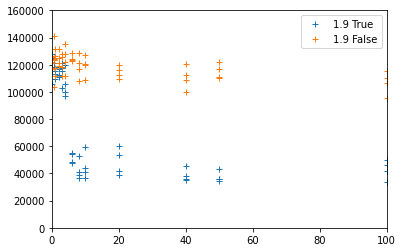

In [230]:
def getRun(df, latticeDepth, Y_rotation, latticeDetuning = 25):
    df_temp = df[df['latticeDepth'] == latticeDepth]
    df_temp2 = df_temp[df_temp['Y_rotation'] == Y_rotation]
    df_temp3 = df_temp2[df_temp2['latticeDetuning'] == latticeDetuning]
    return df_temp3

plt.figure()
for latticeDepth in [1.9]:
    for Y_rotation in [True, False]:
        #df_temp = getRun(df, latticeDepth, Y_rotation, latticeDetuning = 25)
        #plt.plot(df_temp['BECHoldTime'], df_temp['nCount'], '*', label = str(round(latticeDepth, 2)) + ' ' + str(Y_rotation))
        df_temp = getRun(df, latticeDepth, Y_rotation, latticeDetuning = 25)
        plt.plot(df_temp['BECHoldTime'], df_temp['nCount'], '+', label = str(round(latticeDepth, 2)) + ' ' + str(Y_rotation))
plt.legend()
plt.ylim(0, 160000)
plt.xlim(0,100)
plt.show()

In [231]:
results = []

from scipy.optimize import curve_fit
def fitRun_3b_4(df_run):
    N0_guess = max(df_run['nCount'])
    time_guess = max(df_run['BECHoldTime'])
    popt, pcov = curve_fit(N_polarized, df_run['BECHoldTime'], df_run['nCount'],
                       p0 = [N0_guess, 1/time_guess, 1/(N0_guess**2*time_guess)],
                        bounds = ((0, 0, 0), (np.inf, np.inf, np.inf)),
                           method = 'trf'
                      )
    return popt, pcov

def N_polarized(t, N0, alpha, gamma):
    return np.sqrt(alpha / (np.exp(2*alpha*t)*(alpha/(N0**2)+gamma)-gamma))

def N_linear(t, N0, b):
    return N0-b*t

def fitRun_3b_5(df_run):
    N0_guess = max(df_run['nCount'])
    time_guess = max(df_run['BECHoldTime'])
    popt, pcov = curve_fit(N_linear, df_run['BECHoldTime'], df_run['nCount'],
                       p0 = [(N0_guess, N0_guess/time_guess)],
                           method = 'lm'
                      )
    return popt, pcov




for latticeDetuning in latticeDetuningList:
    for latticeDepth in latticeDepthList:
        for Y_rotation in Y_rotationList:
            df_run = getRun(df, latticeDepth, Y_rotation, latticeDetuning)
            #print(latticeDetuning, latticeDepth, Y_rotation)
            if not df_run.empty:
                #popt, pcov = fitRun_3b_3(df_run[df_run['BECHoldTime']<15])
                #popt, pcov = fitRun_3b_4(df_run[df_run['BECHoldTime']<15])
                popt, pcov = fitRun_3b_3(df_run)
                #popt, pcov = fitRun_3b_5(df_run[df_run['BECHoldTime']<20])
                results += [{'latticeDetuning' : latticeDetuning,
                             'latticeDepth' : latticeDepth,
                             'Y_rotation' : Y_rotation,
                            'N0' : popt[0],
                             #'b' : popt[1]
                            #'alpha' : popt[1],
                            'gamma' : popt[1]
                        }]
resultsDF = pd.DataFrame(results)
print('\n')
print(resultsDF)
#perr = np.sqrt(np.diag(pcov))



    latticeDetuning  latticeDepth  Y_rotation             N0         gamma
0              25.0         0.060        True  100328.885256  4.365805e-12
1              25.0         0.060       False  105625.630289  1.085964e-12
2              25.0         0.200        True   96451.206492  6.698761e-12
3              25.0         0.200       False  103345.214754  6.684402e-13
4              25.0         0.100        True  103106.423470  6.964689e-12
5              25.0         0.100       False  105887.605002  8.125783e-13
6              25.0         0.150        True   96712.860726  5.383640e-12
7              25.0         0.150       False  103454.088749  6.208689e-13
8              25.0         0.020        True   97391.652422  2.855896e-12
9              25.0         0.020       False  103532.426020  1.162597e-12
10             25.0         0.080        True  103005.332866  6.003879e-12
11             25.0         0.080       False  105191.579182  8.330133e-13
12             25.0    

In [232]:
def getResult(dfResult, latticeDepth, Y_rotation, latticeDetuning = 25):
    df_temp = dfResult[dfResult['latticeDepth'] == latticeDepth]
    df_temp2 = df_temp[df_temp['Y_rotation'] == Y_rotation]
    df_temp3 = df_temp2[df_temp2['latticeDetuning'] == latticeDetuning]
    return df_temp3

latticeDepth = 1.9
latticeDetuning = 5

df_tempY = getRun(df, latticeDepth, True, latticeDetuning)
df_tempZ = getRun(df, latticeDepth, False, latticeDetuning)
resultY = getResult(resultsDF, latticeDepth, True, latticeDetuning)
resultZ = getResult(resultsDF, latticeDepth, False, latticeDetuning)

time = np.linspace(0, 100, 10000)
NY, gammaY = resultY.iloc[0, 3], resultY.iloc[0, 4]
NZ, gammaZ = resultZ.iloc[0, 3], resultZ.iloc[0, 4]
Y = N_polarized_pure3b(time, NY, gammaY)
Z = N_polarized_pure3b(time, NZ, gammaZ)

plt.figure()
plt.plot(df_tempY['BECHoldTime'], df_tempY['nCount'], '+', label = str(round(latticeDepth, 2)) + ' ' + str(True))
plt.plot(df_tempZ['BECHoldTime'], df_tempZ['nCount'], '+', label = str(round(latticeDepth, 2)) + ' ' + str(False))
plt.plot(time, Y, '-', label = 'fitY')
plt.plot(time, Z, '-', label = 'fitZ')
plt.legend()
plt.ylim(0, 150000)
plt.xlim(0,50)
plt.show()

IndexError: single positional indexer is out-of-bounds

In [217]:
max(df_tempY['nCount']), max(df_tempY['BECHoldTime'])

ValueError: max() arg is an empty sequence

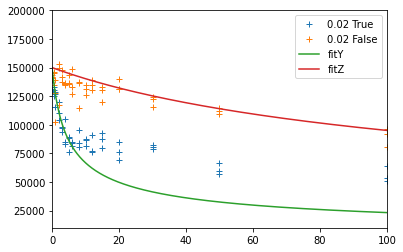

In [209]:
def getResult(dfResult, latticeDepth, Y_rotation, latticeDetuning = 25):
    df_temp = dfResult[dfResult['latticeDepth'] == latticeDepth]
    df_temp2 = df_temp[df_temp['Y_rotation'] == Y_rotation]
    df_temp3 = df_temp2[df_temp2['latticeDetuning'] == latticeDetuning]
    return df_temp3

latticeDepth = 0.02
latticeDetuning = 5
N0_guess, 1/time_guess, 1/(N0_guess**2*time_guess)
df_tempY = getRun(df, latticeDepth, True, latticeDetuning)
df_tempZ = getRun(df, latticeDepth, False, latticeDetuning)
resultY = getResult(resultsDF, latticeDepth, True, latticeDetuning)
resultZ = getResult(resultsDF, latticeDepth, False, latticeDetuning)

time = np.linspace(0, 1000, 10000)
NY, alphaY, gammaY = resultY.iloc[0, 3], resultY.iloc[0, 4], resultY.iloc[0, 5]
NZ, alphaZ, gammaZ = resultZ.iloc[0, 3], resultZ.iloc[0, 4], resultZ.iloc[0, 5]

NY = 150000
NZ = 150000 
alphaY = 0.001*10**(-4)
gammaY = 9*10**(-12)
alphaZ = 4*10**(-4)
gammaZ = 3*10**(-13)

Y = N_polarized(time, NY, alphaY, gammaY)
Z = N_polarized(time, NZ, alphaZ, gammaZ)

plt.figure()
plt.plot(df_tempY['BECHoldTime'], df_tempY['nCount'], '+', label = str(round(latticeDepth, 2)) + ' ' + str(True))
plt.plot(df_tempZ['BECHoldTime'], df_tempZ['nCount'], '+', label = str(round(latticeDepth, 2)) + ' ' + str(False))
plt.plot(time, Y, '-', label = 'fitY')
plt.plot(time, Z, '-', label = 'fitZ')
plt.legend()
plt.ylim(10000,200000)
plt.xlim(0,100)
plt.show()

In [58]:
NY, NZ

(154672.64381833852, 165010.54406426026)

In [237]:
results_ratio = []
for latticeDetuning in latticeDetuningList:
    reducedResult = resultsDF[resultsDF['latticeDetuning'] == latticeDetuning]
    for latticeDepth in latticeDepthList:
        reducedResult2 = reducedResult[reducedResult['latticeDepth'] == latticeDepth]
        gammaY, gammaZ = reducedResult2[reducedResult2['Y_rotation'] == True]['gamma'].mean(), reducedResult2[reducedResult2['Y_rotation'] == False]['gamma'].mean()
        results_ratio += [{'latticeDetuning' : latticeDetuning,
                         'latticeDepth' : latticeDepth,
                        'gamma_ratio' : gammaY/gammaZ}]
results_ratioDF = pd.DataFrame(results_ratio)
results_ratioDF

,latticeDetuning,latticeDepth,gamma_ratio
0,25.0,0.060,4.020212
1,25.0,0.200,10.021481
2,25.0,0.100,8.571098
3,25.0,0.150,8.671139
4,25.0,0.020,2.456479
5,25.0,0.080,7.207422
6,25.0,0.300,28.228929
7,25.0,0.010,2.098364
8,25.0,0.006,2.752485
9,25.0,0.500,41.837410


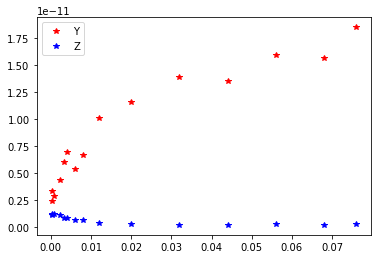

In [238]:
resultsDF_Y = resultsDF[resultsDF['Y_rotation'] == True]
resultsDF_Z = resultsDF[resultsDF['Y_rotation'] == False]
plt.figure()
plt.plot(resultsDF_Y['latticeDepth']/resultsDF_Y['latticeDetuning'], resultsDF_Y['gamma'], 'r*', label = 'Y')
plt.plot(resultsDF_Z['latticeDepth']/resultsDF_Z['latticeDetuning'], resultsDF_Z['gamma'], 'b*', label = 'Z')
plt.legend()
#plt.ylim(0,0.2*10**(-11))
plt.show()

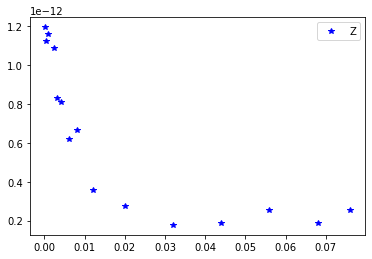

In [239]:
plt.figure()
plt.plot(resultsDF_Z['latticeDepth']/resultsDF_Z['latticeDetuning'], resultsDF_Z['gamma'], 'b*', label = 'Z')
plt.legend()
plt.show()

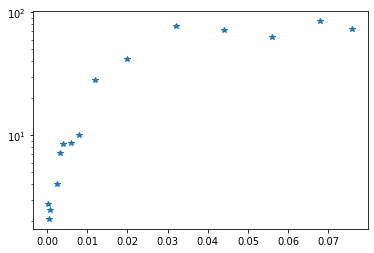

In [240]:
plt.figure()
plt.semilogy(results_ratioDF['latticeDepth']/results_ratioDF['latticeDetuning'], results_ratioDF['gamma_ratio'], '*')
#plt.xlim(0,0.01)
plt.show()

In [70]:
results_ratioDF[results_ratioDF['gamma_ratio'] > 100]

,latticeDetuning,latticeDepth,gamma_ratio
12,25.0,1.4,2062.149702


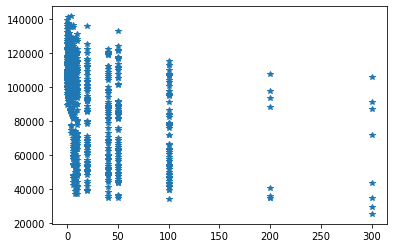

In [71]:
plt.figure()
plt.plot(df['BECHoldTime'], df['nCount'], '*')
plt.show()

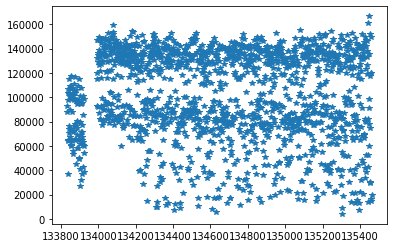

In [134]:
plt.figure()
plt.plot(df['imageID'], df['nCount'], '*')
plt.show()

In [83]:
lattice_power_to_plot = 1.5
time = np.linspace(0, 200, 1000)
df_temp = df[df['lattice_power'] == lattice_power_to_plot]
result_temp = resultsDF_pure3b[resultsDF_pure3b['lattice_power'] == lattice_power_to_plot]
plt.figure()
plt.plot(df_temp['BECHoldTime'], df_temp['nCount'], '*')
plt.plot(time, N_polarized_pure3b(time, result_temp['N0'][0], result_temp['gamma'][0]))
plt.show()

KeyError: 'lattice_power'

0 1.5
0 1.5
0 1.5
1 1.3
1 1.3
1 1.3
2 1.1
2 1.1
2 1.1


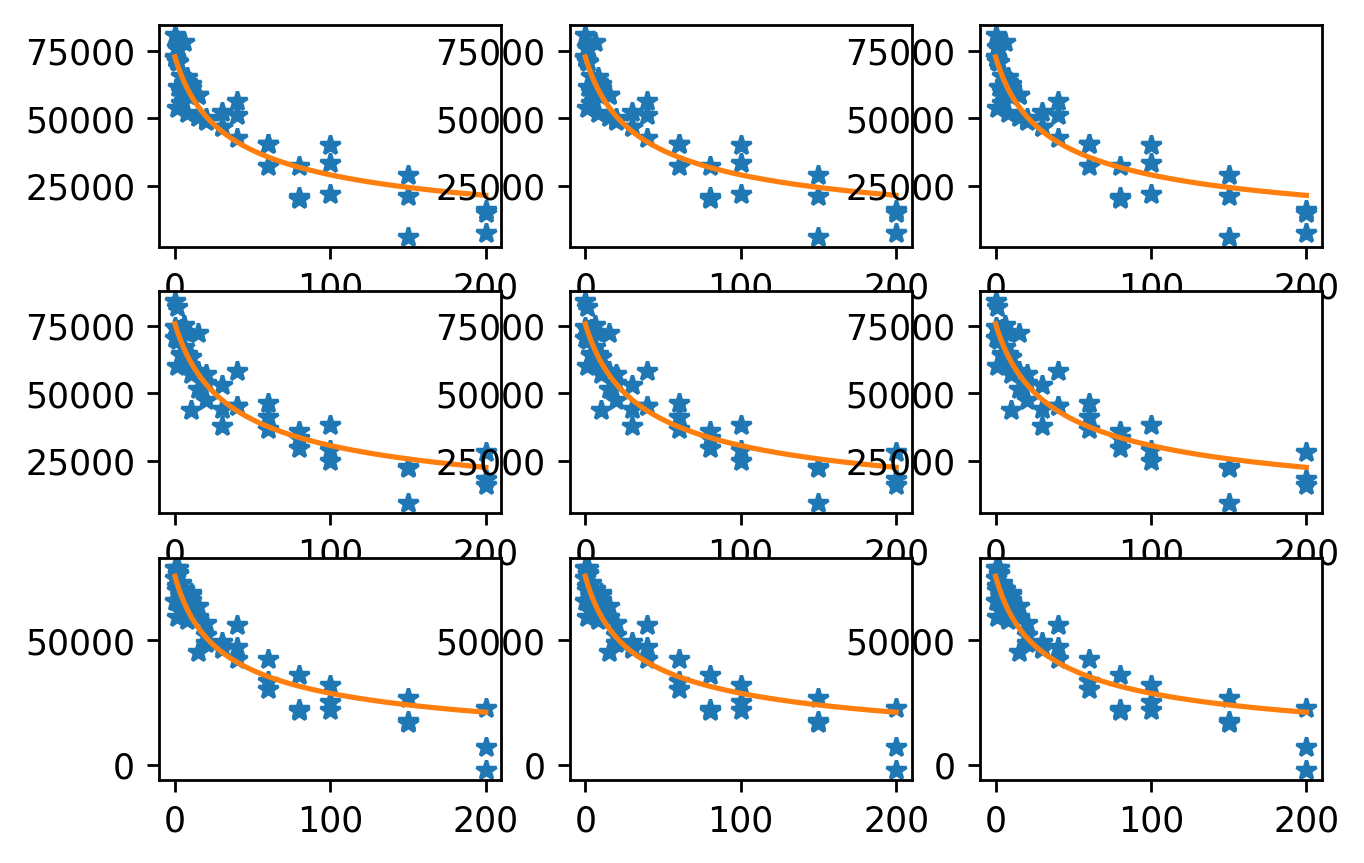

In [25]:
fig, ax = plt.subplots(nrows=3, ncols=3, dpi = 250)
i = 0
time = np.linspace(0, 200, 1000)

for row in ax:
    for col in row:
        try:
            lattice_power_to_plot = resultsDF_pure3b['lattice_power'][i]
            print(i, lattice_power_to_plot)
            df_temp = df[df['lattice_power'] == lattice_power_to_plot]
            result_temp = resultsDF_pure3b[resultsDF_pure3b['lattice_power'] == lattice_power_to_plot]
            col.plot(df_temp['BECHoldTime'], df_temp['nCount'], '*')
            col.plot(time, N_polarized_pure3b(time, result_temp['N0'].mean(), result_temp['gamma'].mean()))
        except:
            print('cannot print')
            pass
    i += 1

0 1.5
0 1.5
0 1.5
1 1.3
1 1.3
1 1.3
2 1.1
2 1.1
2 1.1


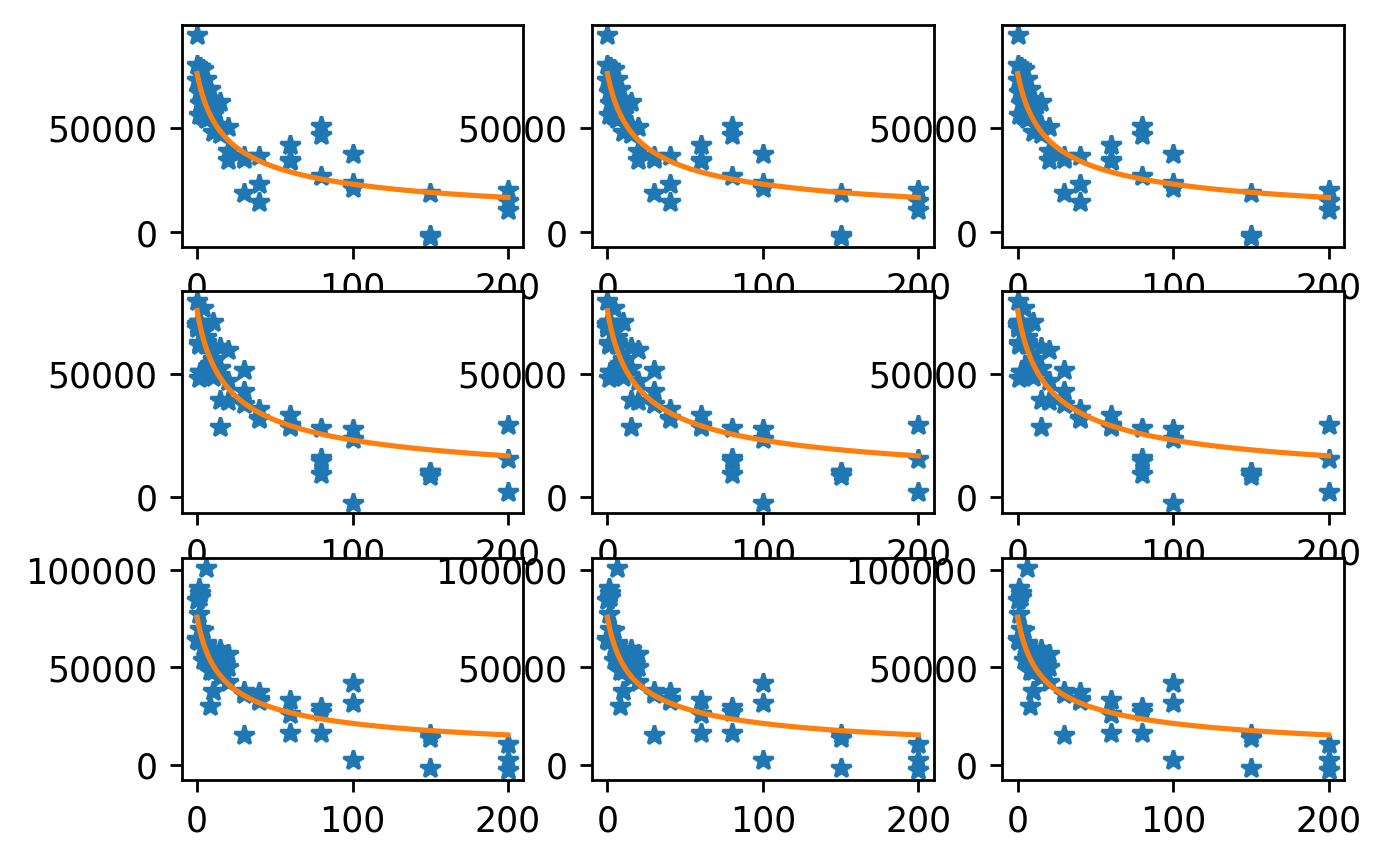

In [26]:
fig, ax = plt.subplots(nrows=3, ncols=3, dpi = 250)
i = 0
time = np.linspace(0, 200, 1000)

for row in ax:
    for col in row:
        try:
            lattice_power_to_plot = resultsDF_pure3b_2['lattice_power'][i]
            print(i, lattice_power_to_plot)
            df_temp2 = df2[df2['lattice_power'] == lattice_power_to_plot]
            result_temp2 = resultsDF_pure3b_2[resultsDF_pure3b_2['lattice_power'] == lattice_power_to_plot]
            col.plot(df_temp2['BECHoldTime'], df_temp2['nCount'], '*')
            col.plot(time, N_polarized_pure3b(time, result_temp['N0'].mean(), result_temp2['gamma'].mean()))
        except:
            print('cannot print')
            pass
    i += 1

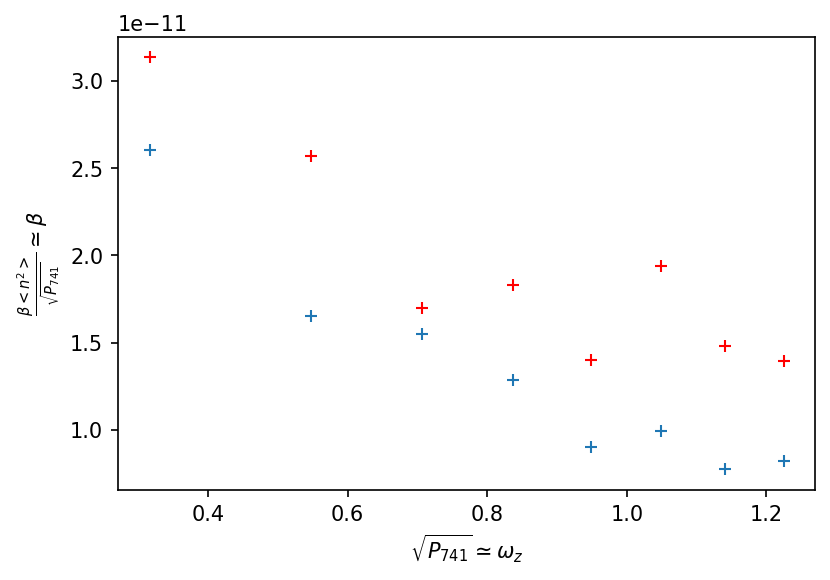

In [27]:
plt.figure(dpi = 150)
plt.plot(resultsDF_pure3b['lattice_power']**(1/2), resultsDF_pure3b['gamma']/resultsDF_pure3b['lattice_power']**(1/2), '+')
plt.plot(resultsDF_pure3b_2['lattice_power']**(1/2), resultsDF_pure3b_2['gamma']/resultsDF_pure3b_2['lattice_power']**(1/2), 'r+')
plt.xlabel(r'$\sqrt{P_{741}} \simeq \omega_{z}$')
plt.ylabel(r'$\frac{\beta<n^{2}>}{\sqrt{P_{741}}} \simeq \beta$')
plt.show()

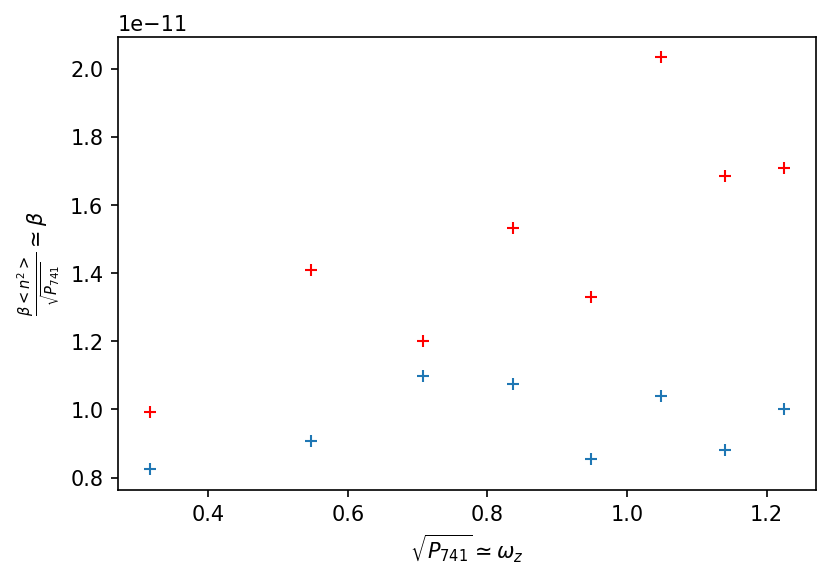

In [29]:
plt.figure(dpi = 150)
plt.plot(resultsDF_pure3b['lattice_power']**(1/2), resultsDF_pure3b['gamma'], '+')
plt.plot(resultsDF_pure3b_2['lattice_power']**(1/2), resultsDF_pure3b_2['gamma'], 'r+')
plt.xlabel(r'$\sqrt{P_{741}} \simeq \omega_{z}$')
plt.ylabel(r'$\frac{\beta<n^{2}>}{\sqrt{P_{741}}} \simeq \beta$')
plt.show()

In [21]:
max_time = 21

results_lin = []
for run in labels:
    lattice_power = run[0][0]
    popt, pcov = fitRun_3b_linear(df, lattice_power, max_time)
    results_lin += [{'lattice_power' : lattice_power,
                        'N0' : popt[0],
                        'gamma' : popt[1]}]
resultsDF_lin = pd.DataFrame(results_lin)
print('\n')
print(resultsDF_lin)
#perr = np.sqrt(np.diag(pcov))

results_lin2 = []
for run in labels:
    lattice_power = run[0][0]
    popt, pcov = fitRun_3b_linear(df2, lattice_power, max_time)
    results_lin2 += [{'lattice_power' : lattice_power,
                        'N0' : popt[0],
                        'gamma' : popt[1]}]
resultsDF_lin2 = pd.DataFrame(results_lin2)
print('\n')
print(resultsDF_lin_2)
#perr = np.sqrt(np.diag(pcov))



   lattice_power            N0        gamma
0            1.5  70632.116636  1050.940147
1            1.3  73726.184031  1080.039517
2            1.1  72636.131395  1011.224988
3            0.9  68669.192142   912.622161
4            0.7  77204.459177  1335.451504
5            0.5  68482.138889   993.812428
6            0.3  78811.693063  1353.862185
7            0.1  69964.100675  1195.816759


   lattice_power            N0        gamma
0            1.5  73736.866176  1605.542357
1            1.3  66933.778284  1116.714852
2            1.1  73574.662415  1549.842855
3            0.9  70716.180479   831.489257
4            0.7  74820.554988  1268.136286
5            0.5  70017.491713   858.117557
6            0.3  76960.230816  1383.925414
7            0.1  82411.782689  1712.965316


1 1.3
2 1.1
3 0.9
4 0.7
5 0.5
6 0.3
7 0.1
cannot print
cannot print


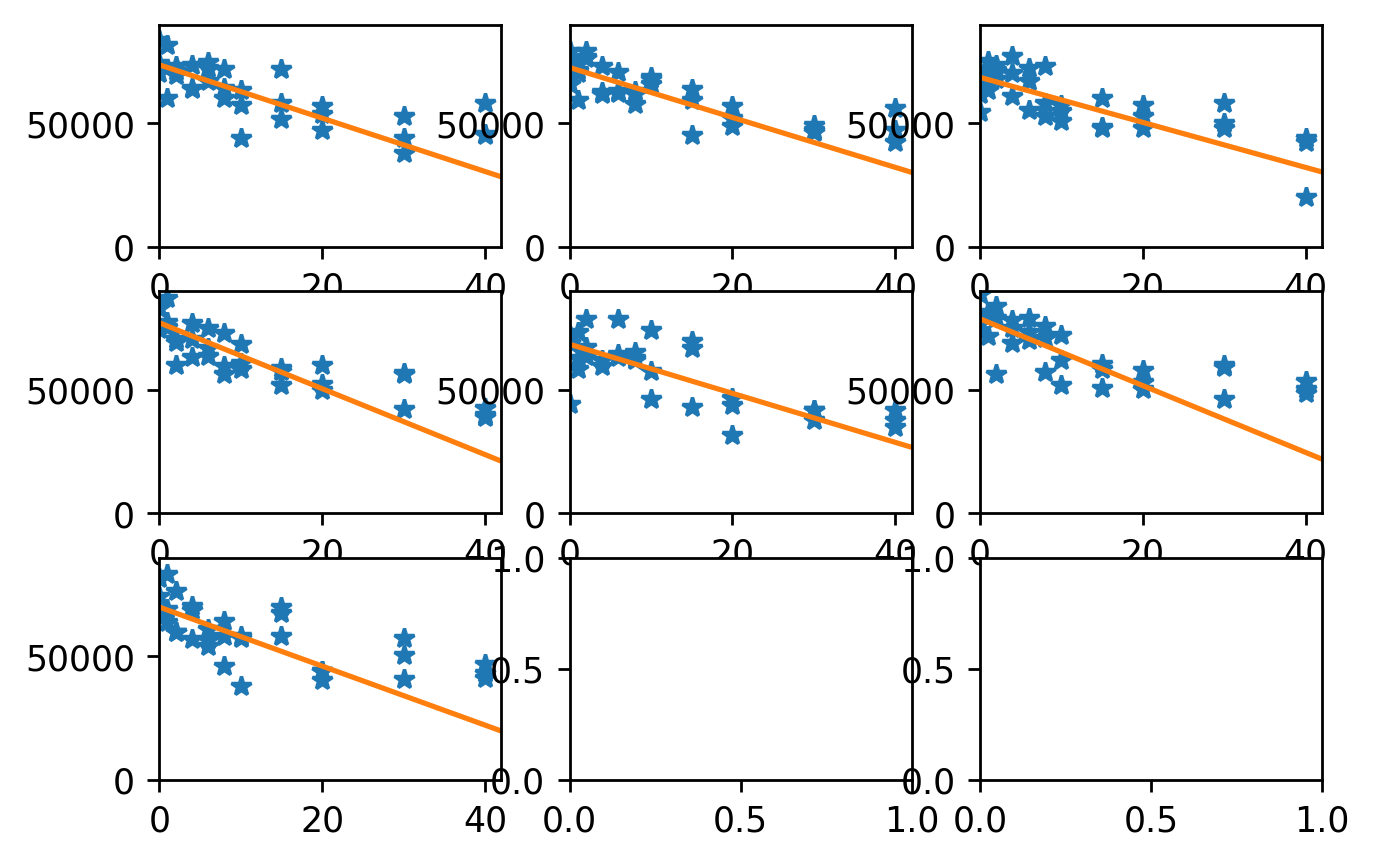

In [22]:
fig, ax = plt.subplots(nrows=3, ncols=3, dpi = 250)
i = 0
time = np.linspace(0, 200, 1000)

for row in ax:
    for col in row:
        i += 1
        try:
            lattice_power_to_plot = resultsDF_lin['lattice_power'][i]
            print(i, lattice_power_to_plot)
            df_temp = df[df['lattice_power'] == lattice_power_to_plot]
            result_temp = resultsDF_lin[resultsDF_lin['lattice_power'] == lattice_power_to_plot]
            col.plot(df_temp['BECHoldTime'], df_temp['nCount'], '*')
            col.plot(time, N_linear(time, result_temp['N0'].mean(), result_temp['gamma'].mean()))
            col.set_xlim((0,2*max_time))
            col.set_ylim((0, 90000))
        except:
            print('cannot print')
            pass

Now we should look at how much time we should shift:

1 1.3
2 1.1
3 0.9
4 0.7
5 0.5
6 0.3
7 0.1
cannot print
cannot print


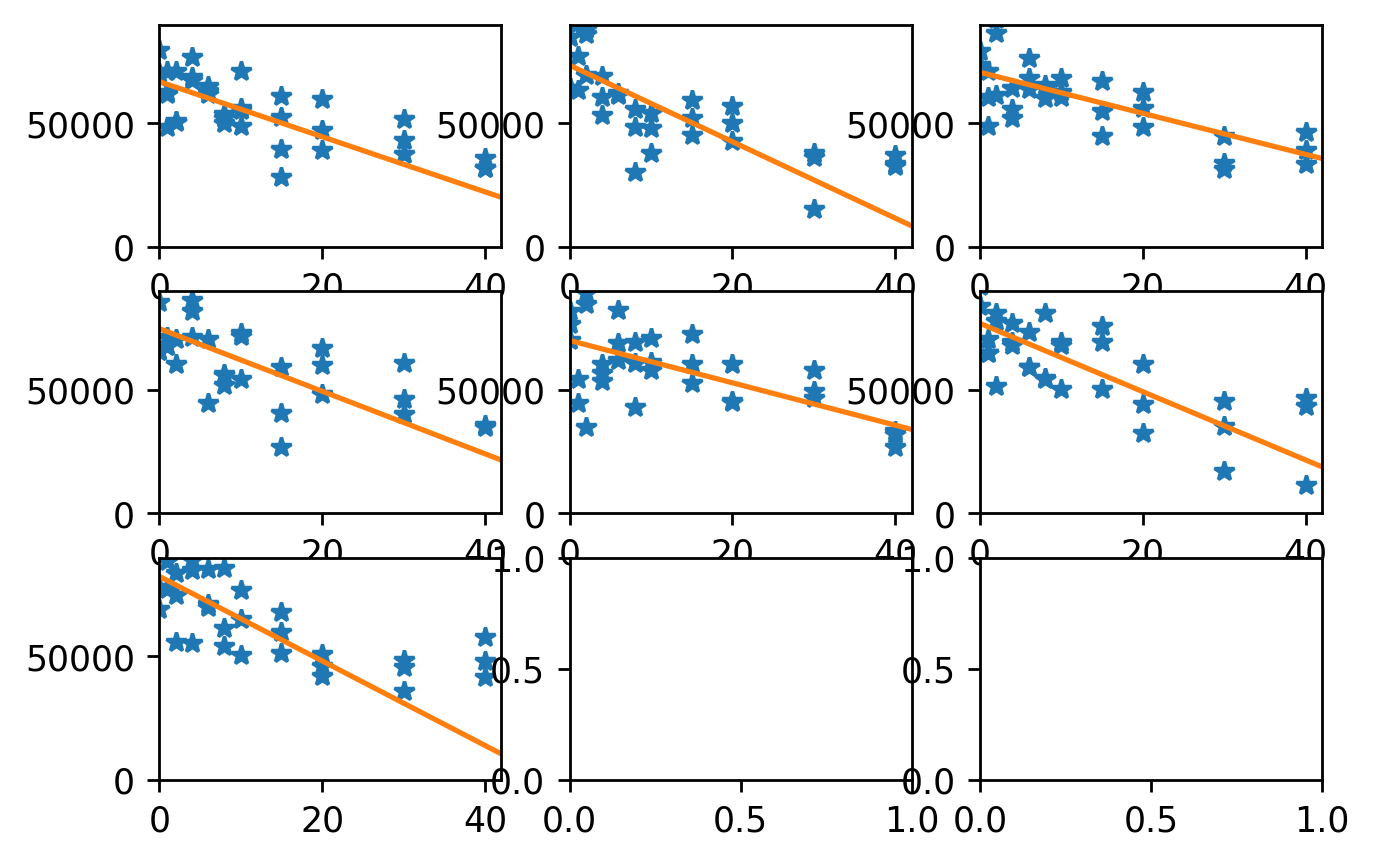

In [23]:
fig, ax = plt.subplots(nrows=3, ncols=3, dpi = 250)
i = 0
time = np.linspace(0, 200, 1000)

for row in ax:
    for col in row:
        i += 1
        try:
            lattice_power_to_plot = resultsDF_lin2['lattice_power'][i]
            print(i, lattice_power_to_plot)
            df_temp = df2[df2['lattice_power'] == lattice_power_to_plot]
            result_temp = resultsDF_lin2[resultsDF_lin2['lattice_power'] == lattice_power_to_plot]
            col.plot(df_temp['BECHoldTime'], df_temp['nCount'], '*')
            col.plot(time, N_linear(time, result_temp['N0'].mean(), result_temp['gamma'].mean()))
            col.set_xlim((0,2*max_time))
            col.set_ylim((0, 90000))
        except:
            print('cannot print')
            pass

Now we can calculate the ration of the beta, provided the derivative of the N_polarized_pure3b function: $\frac{dN}{dt} = -\frac{1}{2}N_{0}^{3}\gamma\left(1+N_{0}^{2}\gamma t\right)^{-3/2}$

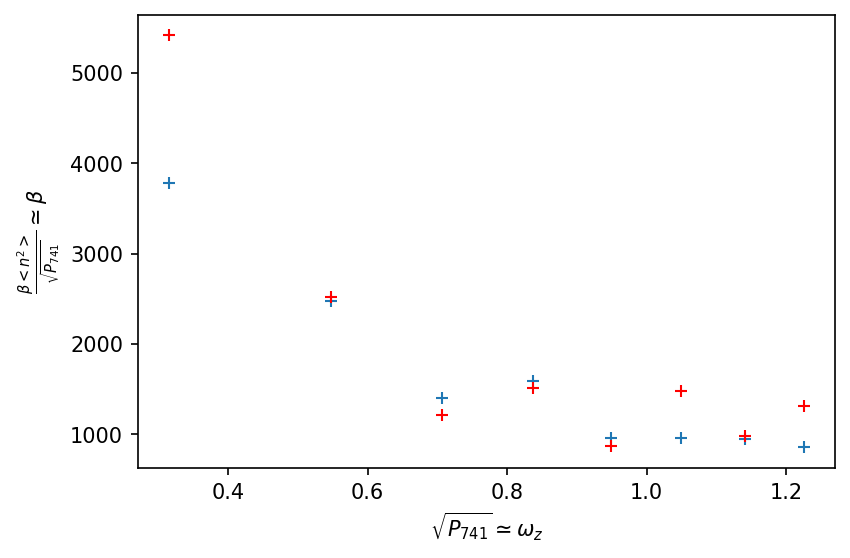

In [24]:
plt.figure(dpi = 150)
plt.plot(resultsDF_lin['lattice_power']**(1/2), resultsDF_lin['gamma']/resultsDF_lin['lattice_power']**(1/2), '+')
plt.plot(resultsDF_lin2['lattice_power']**(1/2), resultsDF_lin2['gamma']/resultsDF_lin2['lattice_power']**(1/2), 'r+')
plt.xlabel(r'$\sqrt{P_{741}} \simeq \omega_{z}$')
plt.ylabel(r'$\frac{\beta<n^{2}>}{\sqrt{P_{741}}} \simeq \beta$')
plt.show()

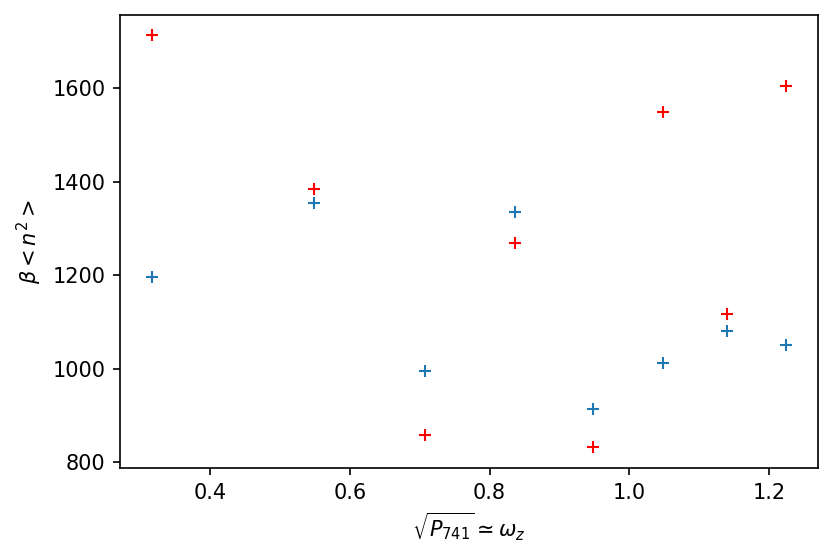

In [31]:
plt.figure(dpi = 150)
plt.plot(resultsDF_lin['lattice_power']**(1/2), resultsDF_lin['gamma'], '+')
plt.plot(resultsDF_lin2['lattice_power']**(1/2), resultsDF_lin2['gamma'], 'r+')
plt.xlabel(r'$\sqrt{P_{741}} \simeq \omega_{z}$')
plt.ylabel(r'$\beta<n^{2}>$')
plt.show()

In [18]:
detuning = '1.5V'
TOF = 4
beta_y_init = getBeta(resultsDF_pure3b, detuning, 'By', TOF)  # this is the gamma from the fit
beta_z_init = getBeta(resultsDF_pure3b, detuning, 'Bz', TOF)
dt = deltaTime(resultsDF_pure3b, detuning, TOF)

results_By = getReducedResults(resultsDF_pure3b, detuning, 'By', TOF)  # this is the full results of a fit
results_Bz = getReducedResults(resultsDF_pure3b, detuning, 'Bz', TOF)
N0_y, gamma_y = results_By['N0'].iloc[0], results_By['gamma'].iloc[0]
N0_z, gamma_z = results_Bz['N0'].iloc[0], results_Bz['gamma'].iloc[0]
        
beta_y = dN_polarized_pure3b_dt(0, N0_y, gamma_y)
beta_z = dN_polarized_pure3b_dt(dt, N0_z, gamma_z)
#beta_z/beta_y
print(beta_y)
print(beta_z)


-1807.7246420591434
-443.11571006855024


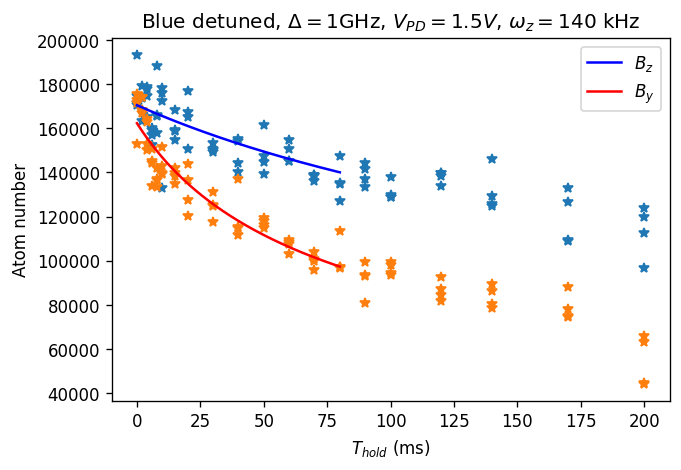

In [20]:
detuning = '1.5V'
TOF = 4
df_reduced_z = getReducedDataframe(df, detuning,'Bz', TOF)
df_reduced_y = getReducedDataframe(df, detuning,'By', TOF)
result_reduced_z = getReducedResults(resultsDF_pure3b, detuning, 'Bz', TOF)
result_reduced_y = getReducedResults(resultsDF_pure3b, detuning, 'By', TOF)

dNdt = dN_polarized_pure3b_dt(dt, result_reduced_z['N0'].iloc[0], result_reduced_z['gamma'].iloc[0])
holdTime = np.linspace(0,80, 300)
plt.figure(dpi = 120)
plt.plot(df_reduced_z['BECHoldTime'], df_reduced_z['nCount'], '*')
plt.plot(df_reduced_y['BECHoldTime'], df_reduced_y['nCount'], '*')
plt.plot(holdTime, N_polarized_pure3b(holdTime, result_reduced_z['N0'].iloc[0], result_reduced_z['gamma'].iloc[0]), color = 'blue', label = '$B_{z}$')
plt.plot(holdTime, N_polarized_pure3b(holdTime, result_reduced_y['N0'].iloc[0], result_reduced_y['gamma'].iloc[0]), color = 'red', label = '$B_{y}$')
plt.title('Blue detuned, $\Delta = 1$GHz, $V_{PD} = 1.5V$, $\omega_{z} = 140$ kHz')
plt.legend()
plt.xlabel('$T_{hold}$ (ms)')
plt.ylabel('Atom number')
plt.show()

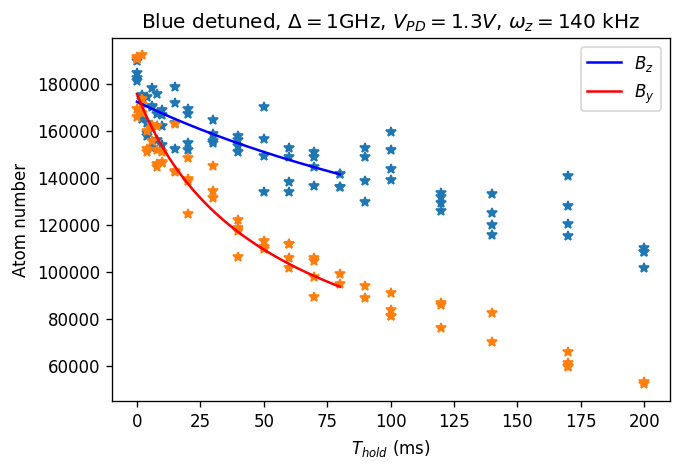

In [22]:
detuning = '1.3V'
TOF = 4
df_reduced_z = getReducedDataframe(df, detuning,'Bz', TOF)
df_reduced_y = getReducedDataframe(df, detuning,'By', TOF)
result_reduced_z = getReducedResults(resultsDF_pure3b, detuning, 'Bz', TOF)
result_reduced_y = getReducedResults(resultsDF_pure3b, detuning, 'By', TOF)

dNdt = dN_polarized_pure3b_dt(dt, result_reduced_z['N0'].iloc[0], result_reduced_z['gamma'].iloc[0])
holdTime = np.linspace(0,80, 300)
plt.figure(dpi = 120)
plt.plot(df_reduced_z['BECHoldTime'], df_reduced_z['nCount'], '*')
plt.plot(df_reduced_y['BECHoldTime'], df_reduced_y['nCount'], '*')
plt.plot(holdTime, N_polarized_pure3b(holdTime, result_reduced_z['N0'].iloc[0], result_reduced_z['gamma'].iloc[0]), color = 'blue', label = '$B_{z}$')
plt.plot(holdTime, N_polarized_pure3b(holdTime, result_reduced_y['N0'].iloc[0], result_reduced_y['gamma'].iloc[0]), color = 'red', label = '$B_{y}$')
plt.title('Blue detuned, $\Delta = 1$GHz, $V_{PD} = 1.3V$, $\omega_{z} = 140$ kHz')
plt.legend()
plt.xlabel('$T_{hold}$ (ms)')
plt.ylabel('Atom number')
plt.show()

In [15]:
resultsDF_pure3b

,detuning,TOF,field_direction,N0,gamma
0,0.5GHz,3,Bz,131028.827443,1.713659e-12
1,0.5GHz,3,By,132199.355160,3.000413e-12


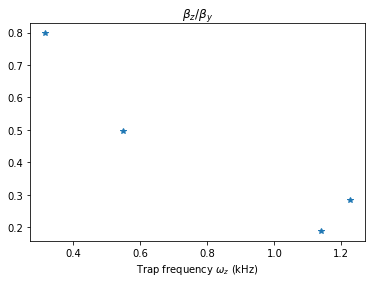

In [21]:
points15V = results_betaRatio[results_betaRatio['detuning'] == '1.5V']['betaRatio']
points13V = results_betaRatio[results_betaRatio['detuning'] == '1.3V']['betaRatio']
points03V = results_betaRatio[results_betaRatio['detuning'] == '0.3V']['betaRatio']
points01V = results_betaRatio[results_betaRatio['detuning'] == '0.1V']['betaRatio']
ratios = [points15V, points13V, points03V, points01V]
plt.figure()
plt.plot(np.sqrt(np.array([1.5, 1.3, 0.3, 0.1])), ratios, '*')
plt.title(r'$\beta_{z}/\beta_{y}$')
plt.xlabel(r'Trap frequency $\omega_{z}$ (kHz)')
plt.show()

In [17]:
results_betaRatio

,detuning,TOF,betaRatio
0,0.5GHz,3,0.556104


It doesn't look good at all, it should be reversed, the $\beta_{z}$ should be equal to $\beta_{y}$ for small $\omega_{z}$ and drop at the threshold.

0.5GHz 3


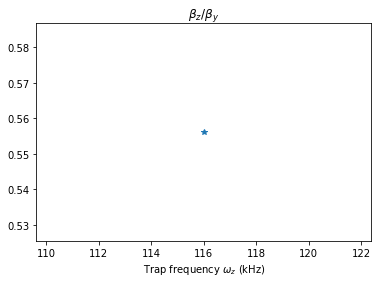

In [26]:
def dN_polarized_pure3b_dt(t, N0, gamma):
    return -0.5*N0**3*gamma*(1+N0**2*gamma*t)**(-3/2)

def getBeta(results, detuning, field_direction, TOF):
    temp = results[results['detuning'] == detuning]
    temp = temp[temp['TOF'] == TOF]
    return temp[temp['field_direction'] == field_direction]['gamma']

results_betaRatio = []
for detuning in ['0.5GHz']:#, '1.5GHz']:
    for TOF in [3]:#, 3]:
        print(detuning, TOF)
        beta_y_init = getBeta(resultsDF_pure3b, detuning, 'By', TOF)
        beta_z_init = getBeta(resultsDF_pure3b, detuning, 'Bz', TOF)
        dt = deltaTime(resultsDF_pure3b, detuning, TOF)
        
        results_By = getReducedResults(resultsDF_pure3b, detuning, 'By', TOF)
        results_Bz = getReducedResults(resultsDF_pure3b, detuning, 'Bz', TOF)
        N0_y, gamma_y = results_By['N0'].iloc[0], results_By['gamma'].iloc[0]
        N0_z, gamma_z = results_Bz['N0'].iloc[0], results_Bz['gamma'].iloc[0]
        
        beta_y = dN_polarized_pure3b_dt(0, N0_y, gamma_y)
        beta_z = dN_polarized_pure3b_dt(0, N0_z, gamma_z)
        
        results_betaRatio += [{'detuning' : detuning,
                        'TOF' : TOF,
                        'betaRatio' : beta_z/beta_y}]

results_betaRatio = pd.DataFrame(results_betaRatio)

results_betaRatio

points05G = results_betaRatio[results_betaRatio['detuning'] == '0.5GHz']['betaRatio']
#points15G = results_betaRatio[results_betaRatio['detuning'] == '1.5GHz']['betaRatio']

plt.figure()
plt.plot([116], points05G, '*')
#plt.plot([96], points15G, '*')
plt.title(r'$\beta_{z}/\beta_{y}$')
plt.xlabel(r'Trap frequency $\omega_{z}$ (kHz)')
plt.show()